In [15]:
import pandas as pd
import random
import itertools
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#%config InlineBackend.figure_format='png'
%matplotlib inline

import calendar

import numpy as np

In [16]:
 download = True

if download:
    dates = ['180505', '180512', '180519', '180526']
    
    mta_df = []
    
    for date in dates:
        url = f'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt'
        print(f'downloading {url}')
        
        mta_df.append(
            pd.read_csv(url)
        )

    df = pd.concat(mta_df)
    df.to_csv('turnstile_mta.csv')
else:
    df = pd.read_csv('turnstile_mta.csv', index_col=0)

downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180505.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180512.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180519.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180526.txt


In [17]:
df.reset_index(inplace=True, drop=True)

Downloaded data from: http://web.mta.info/developers/turnstile.html

Documentations at: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

Map of the MTA system: http://web.mta.info/maps/submap.html

**Challenge 1**

In [18]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [20]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

Fix 'EXITS' column name (it has many spaces at the end of it)

In [21]:

df.rename(columns={df.columns[-1]: 'EXITS'}, inplace = True)

In [22]:
df1 = df.copy()

In [23]:
df.dtypes


C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [24]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [25]:
df['DATETIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME, format="%m/%d/%Y %H:%M:%S")
df['DATE'] = pd.to_datetime(df['DATE'] )

In [27]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00


In [11]:
df.dtypes

C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DATE                                                                    datetime64[ns]
TIME                                                                            object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
DATETIME                                   

In [32]:
df.groupby(['DATE','C/A','UNIT','SCP','STATION'])['TIME'].count().values

array([6, 6, 6, ..., 6, 6, 6])

These are total 6 daily entries  for every turnstile ion every station.So entries are recorded every 4 hrs, n=4

In [160]:
df.sort_values(by=['C/A','UNIT','SCP','STATION', 'DATETIME'], inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,STATION_KEY,ENTRY_DIFFS,EXIT_DIFFS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00,A002 R051 59 ST,24.0,2.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00,A002 R051 59 ST,20.0,24.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00,A002 R051 59 ST,81.0,77.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00,A002 R051 59 ST,196.0,66.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00,A002 R051 59 ST,227.0,39.0


Sort values  for ech turnstile and datetime 

In [38]:
df.TIME.unique

<bound method Series.unique of 0         00:00:00
1         04:00:00
2         08:00:00
3         12:00:00
4         16:00:00
5         20:00:00
6         00:00:00
7         04:00:00
8         08:00:00
9         12:00:00
10        16:00:00
11        20:00:00
12        00:00:00
13        04:00:00
14        08:00:00
15        12:00:00
16        16:00:00
17        20:00:00
18        00:00:00
19        04:00:00
20        08:00:00
21        12:00:00
22        16:00:00
23        20:00:00
24        00:00:00
25        04:00:00
26        08:00:00
27        12:00:00
28        16:00:00
29        20:00:00
            ...   
788734    01:00:00
788735    05:00:00
788736    09:00:00
788737    13:00:00
788738    17:00:00
788739    21:00:00
788740    01:00:00
788741    05:00:00
788742    09:00:00
788743    13:00:00
788744    17:00:00
788745    21:00:00
788746    01:00:00
788747    05:00:00
788748    09:00:00
788749    13:00:00
788750    17:00:00
788751    21:00:00
788752    01:00:00
788753    05:00:00


In [39]:
df1=df.copy()

**Calculate daily entries for each Turnstile**

1. Group by datetime ,trunstile  and aggregate entry diffs by summing 

In [40]:
df1['ENTRY_DIFF'] = (df1.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['ENTRIES']
                           .diff(periods=-1)) * -1

In [41]:
df1['EXIT_DIFFS'] = df1.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['EXITS'].diff(periods=-1)*-1

In [42]:
df1.dropna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFFS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,17.0,1.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,16.0,33.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,81.0,92.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,214.0,60.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,281.0,59.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,20:00:00,REGULAR,6599456,2236074,2018-04-28 20:00:00,128.0,28.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29,00:00:00,REGULAR,6599584,2236102,2018-04-29 00:00:00,9.0,4.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29,04:00:00,REGULAR,6599593,2236106,2018-04-29 04:00:00,10.0,17.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29,08:00:00,REGULAR,6599603,2236123,2018-04-29 08:00:00,86.0,57.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-29,12:00:00,REGULAR,6599689,2236180,2018-04-29 12:00:00,161.0,52.0


In [43]:
# 200,000 entries per day is a reasonable cut-off and removing negative diffs
clean_df = df1[(df1['ENTRY_DIFF'] < 200000) 
              & (df1['ENTRY_DIFF'] > 0) 
              & (df1['EXIT_DIFFS'] < 2E5)
              & (df1['EXIT_DIFFS'] > 0)]

In [44]:
#check the statistics of the numerical data
clean_df.describe()

,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFFS
count,6.385790e+05,6.385790e+05,638579.000000,638579.000000
mean,2.693417e+07,1.973831e+07,222.519438,167.590655
std,1.587428e+08,1.313576e+08,275.304168,244.575278
min,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,8.411840e+05,4.919710e+05,34.000000,25.000000
50%,3.110777e+06,1.852138e+06,125.000000,81.000000
75%,7.090936e+06,5.144146e+06,307.000000,209.000000
max,2.115486e+09,2.037087e+09,10219.000000,6033.000000


In [45]:
clean_df1=clean_df.copy()

In [170]:
#create a column for total traffic in each turnstile
clean_df1['TOTAL']=clean_df1['ENTRY_DIFF']+clean_df1['EXIT_DIFFS']

In [46]:
clean_df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFFS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,17.0,1.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,16.0,33.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,81.0,92.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,214.0,60.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-04-28,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,281.0,59.0


In [57]:
#drop unwanted columns
clean_df1.drop(['ENTRIES','EXITS'],axis=1,inplace=True)

In [58]:
#group by each turnstile and date and sum all entries 
grp2=clean_df1.groupby(['C/A','UNIT','SCP','STATION','DATE']).sum()

In [59]:
df_day=grp2.reset_index()

In [64]:
#df showing total daily entries and exits
df_day.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRY_DIFF,EXIT_DIFFS
0,A002,R051,02-00-00,59 ST,2018-04-28,737.0,273.0
1,A002,R051,02-00-00,59 ST,2018-04-29,575.0,199.0
2,A002,R051,02-00-00,59 ST,2018-04-30,1603.0,551.0
3,A002,R051,02-00-00,59 ST,2018-05-01,1512.0,568.0
4,A002,R051,02-00-00,59 ST,2018-05-02,1513.0,555.0


**Daily time series for a turnstile**

In [67]:
len(df_day['C/A'].unique())

732

In [70]:
len(df_day['SCP'].unique())

202

In [71]:
len(df_day['UNIT'].unique())

464

In [75]:
len(df_day.groupby(['C/A','UNIT','SCP','STATION']).count())#count of tunstiles

4191

In [82]:
# df that only contains entries from a turnstile labeled by scp and c/a for each unit in station
df_t = df_day[(df_day['C/A'] == 'A002')& (df_day['SCP'] == '02-00-00')\
               &(df_day['STATION']=='59 ST')&(df_day['UNIT']=='R051')]
               

In [87]:
df_t.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRY_DIFF,EXIT_DIFFS
0,A002,R051,02-00-00,59 ST,2018-04-28,737.0,273.0
1,A002,R051,02-00-00,59 ST,2018-04-29,575.0,199.0
2,A002,R051,02-00-00,59 ST,2018-04-30,1603.0,551.0
3,A002,R051,02-00-00,59 ST,2018-05-01,1512.0,568.0
4,A002,R051,02-00-00,59 ST,2018-05-02,1513.0,555.0


In [119]:
dt_label=(df_t['DATE'][::2]).tolist()

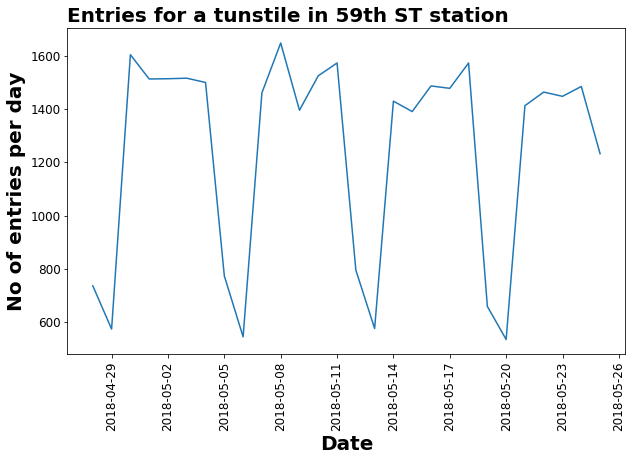

In [134]:
#plotting entries from asingle tunstile
plt.figure(figsize=[10,6])
x = df_t.DATE
y = df_t.ENTRY_DIFF
plt.plot(x, y)
plt.xticks( rotation=90)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.title('Entries for a tunstile in 59th ST station',fontsize = 20,weight='bold',loc='left',color='k')
plt.xlabel('Date',fontsize = 20, weight = 'bold',color='k')
plt.ylabel('No of entries per day',fontsize = 20, weight = 'bold')
#(specify locs,labels,value of x axis)
plt.show()

**Combining turnstiles in a single C/A, unit, station level**

In [137]:
#COUNT OF NO OF TUNSTILES IN EACH STATION 
df_day.groupby(['C/A','UNIT','STATION']).count()

,,,SCP,DATE,ENTRY_DIFF,EXIT_DIFFS
C/A,UNIT,STATION,,,,
A002,R051,59 ST,280,280,280,280
A006,R079,5 AV/59 ST,224,224,224,224
A007,R079,5 AV/59 ST,112,112,112,112
A010,R080,57 ST-7 AV,224,224,224,224
A011,R080,57 ST-7 AV,112,112,112,112
A013,R081,49 ST,112,112,112,112
A014,R081,49 ST,140,140,140,140
A015,R081,49 ST,164,164,164,164
A016,R081,49 ST,138,138,138,138


In [139]:
#SUM OF ALL ENTRIES FOR EACH TURNSTILE  BY DAY
df_day.groupby(['C/A','UNIT','STATION','SCP','DATE']).sum()

ENTRY_DIFF  EXIT_DIFFS
C/A   UNIT STATION       SCP      DATE                              
A002  R051 59 ST         02-00-00 2018-04-28       737.0       273.0
                                  2018-04-29       575.0       199.0
                                  2018-04-30      1603.0       551.0
                                  2018-05-01      1512.0       568.0
                                  2018-05-02      1513.0       555.0
                                  2018-05-03      1515.0       572.0
                                  2018-05-04      1499.0       500.0
                                  2018-05-05       774.0       251.0
                                  2018-05-06       546.0       175.0
                                  2018-05-07      1460.0       432.0
                                  2018-05-08      1647.0       556.0
                                  2018-05-09      1395.0       573.0
                                  2018-05-10      1524.0       517.0
                                  2018-05-11      1572.0       557.0
                                  2018-05-12       796.0       234.0
                                  2018-05-13       577.0       176.0
                                  2018-05-14      1429.0       582.0
                                  2018-05-15      1390.0       541.0
                                  2018-05-16      1486.0       543.0
                                  2018-05-17      1477.0       578.0
                                  2018-05-18      1572.0       550.0
                                  2018-05-19       660.0       225.0
                                  2018-05-20       536.0       195.0
                                  2018-05-21      1412.0       549.0
                                  2018-05-22      1463.0       566.0
                                  2018-05-23      1447.0       576.0
                                  2018-05-24      1484.0       559.0
                                  2018-05-25      1232.0       483.0
                         02-00-01 2018-04-28       601.0       147.0
                                  2018-04-29       561.0       101.0
...                                                  ...         ...
TRAM2 R469 RIT-ROOSEVELT 00-03-00 2018-05-24      1487.0        25.0
                                  2018-05-25      1374.0        15.0
                         00-03-01 2018-04-28       627.0        20.0
                                  2018-04-29       436.0        19.0
                                  2018-04-30       350.0        12.0
                                  2018-05-01       346.0        15.0
                                  2018-05-02       351.0        17.0
                                  2018-05-03       455.0        29.0
                                  2018-05-04       387.0        14.0
                                  2018-05-05       483.0        16.0
                                  2018-05-06       341.0        22.0
                                  2018-05-07       360.0        16.0
                                  2018-05-08       345.0        16.0
                                  2018-05-09       364.0        18.0
                                  2018-05-10       275.0        19.0
                                  2018-05-11       355.0        22.0
                                  2018-05-12       203.0        15.0
                                  2018-05-13       276.0        14.0
                                  2018-05-14       285.0        18.0
                                  2018-05-15       193.0        15.0
                                  2018-05-16      1284.0        25.0
                                  2018-05-17      1167.0        14.0
                                  2018-05-18      1698.0        36.0
                                  2018-05-19      1161.0        24.0
                                  2018-05-20      1632.0        18.0
                                  2018-05-21

**CHALLENGE 5**

In [138]:
#CHALLENGE 5 : SUM OF ALL ENTRIES ANFD EXITS FOR ALL TRUNSTILES BY DATE , STATION,C/A,UNIT
df_day.groupby(['C/A','UNIT','STATION','DATE']).sum()

ENTRY_DIFF  EXIT_DIFFS
C/A   UNIT STATION       DATE                              
A002  R051 59 ST         2018-04-28      7679.0      4493.0
                         2018-04-29      6147.0      3497.0
                         2018-04-30     13589.0      8335.0
                         2018-05-01     13772.0      8501.0
                         2018-05-02     13944.0      8534.0
                         2018-05-03     14163.0      8833.0
                         2018-05-04     13683.0      8176.0
                         2018-05-05      7458.0      4482.0
                         2018-05-06      5752.0      3235.0
                         2018-05-07     13183.0      7212.0
                         2018-05-08     13872.0      8705.0
                         2018-05-09     14195.0      8734.0
                         2018-05-10     14179.0      8784.0
                         2018-05-11     13891.0      8509.0
                         2018-05-12      8102.0      4622.0
                         2018-05-13      6772.0      3769.0
                         2018-05-14     13497.0      8440.0
                         2018-05-15     13534.0      8861.0
                         2018-05-16     13946.0      9033.0
                         2018-05-17     14021.0      8667.0
                         2018-05-18     13970.0      8551.0
                         2018-05-19      6537.0      3981.0
                         2018-05-20      5507.0      3452.0
                         2018-05-21     13159.0      8141.0
                         2018-05-22     13669.0      8690.0
                         2018-05-23     14233.0      8919.0
                         2018-05-24     13542.0      8441.0
                         2018-05-25     11097.0      7576.0
A006  R079 5 AV/59 ST    2018-04-28      7105.0      5184.0
                         2018-04-29      5329.0      4176.0
...                                         ...         ...
TRAM1 R468 RIT-MANHATTAN 2018-05-24      3487.0        61.0
                         2018-05-25      2796.0        42.0
TRAM2 R469 RIT-ROOSEVELT 2018-04-28      5621.0        84.0
                         2018-04-29      4655.0        70.0
                         2018-04-30      2935.0        59.0
                         2018-05-01      3963.0        63.0
                         2018-05-02      2857.0        46.0
                         2018-05-03      3001.0        82.0
                         2018-05-04      3774.0        82.0
                         2018-05-05      4888.0        95.0
                         2018-05-06      3433.0        93.0
                         2018-05-07      3159.0        56.0
                         2018-05-08      3445.0        56.0
                         2018-05-09      4220.0        73.0
                         2018-05-10      3448.0       101.0
                         2018-05-11      4011.0        96.0
                         2018-05-12      5038.0        71.0
                         2018-05-13      4588.0        54.0
                         2018-05-14      3275.0        80.0
                         2018-05-15      3121.0       105.0
                         2018-05-16      2515.0        37.0
                         2018-05-17      2200.0        24.0
                         2018-05-18      3202.0        57.0
                         2018-05-19      2165.0        33.0
                         2018-05-20      3083.0        46.0
                         2018-05-21      3141.0        43.0
                         2018-05-22      2283.0        29.0
                         2018-05-23      3046.0        41.0
                         2018-05-24      3198.0        50.0
                         2018-05-25      2870.0        34.0

[20107 rows x 2 columns]

**CHALLENGE 6**

In [171]:
clean_df1['STATION_KEY']=clean_df1['STATION']+' '+clean_df1['C/A']+' '+clean_df1['UNIT']

In [172]:
clean_df1['DAYOFWEEK']=clean_df1['DATETIME'].dt.weekday

In [173]:
clean_df1['TIME']=pd.to_datetime(clean_df1['TIME'])

In [174]:
clean_df1['TIME']=clean_df1['TIME'].dt.time

In [175]:
clean_df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,STATION_KEY,ENTRY_DIFFS,EXIT_DIFFS,ENTRY_DIFF,TOTAL,DAYOFWEEK
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00,59 ST A002 R051,24.0,2.0,24.0,26.0,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00,59 ST A002 R051,20.0,24.0,20.0,44.0,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00,59 ST A002 R051,81.0,77.0,81.0,158.0,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00,59 ST A002 R051,196.0,66.0,196.0,262.0,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-19,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00,59 ST A002 R051,227.0,39.0,227.0,266.0,5


**Daily time series for a turnstile**

In [150]:
grp_sd=df_day.groupby(['STATION','DATE']).sum()

In [159]:
print(grp_sd)

                      ENTRY_DIFF  EXIT_DIFFS
STATION   DATE                              
1 AV      2018-04-28     20139.0     23091.0
          2018-04-29     15331.0     16992.0
          2018-04-30     21710.0     24414.0
          2018-05-01     22367.0     23766.0
          2018-05-02     23130.0     24774.0
          2018-05-03     23604.0     25216.0
          2018-05-04     24208.0     26591.0
          2018-05-05     19964.0     22717.0
          2018-05-06     14678.0     15767.0
          2018-05-07     21268.0     22911.0
          2018-05-08     22509.0     24700.0
          2018-05-09     22948.0     24445.0
          2018-05-10     23015.0     25762.0
          2018-05-11     24388.0     26205.0
          2018-05-12     17985.0     20659.0
          2018-05-13     12964.0     14890.0
          2018-05-14     21414.0     23604.0
          2018-05-15     22463.0     26500.0
          2018-05-16     24011.0     26684.0
          2018-05-17     23643.0     25692.0
          

In [151]:
df_st=grp_sd.reset_index()

In [152]:
#count od entries for each staion by date indexed by date timeseries
df_st.set_index(df_st['DATE']).head()


,STATION,DATE,ENTRY_DIFF,EXIT_DIFFS
DATE,,,,
2018-04-28,1 AV,2018-04-28,20139.0,23091.0
2018-04-29,1 AV,2018-04-29,15331.0,16992.0
2018-04-30,1 AV,2018-04-30,21710.0,24414.0
2018-05-01,1 AV,2018-05-01,22367.0,23766.0
2018-05-02,1 AV,2018-05-02,23130.0,24774.0


In [229]:

df_st.DATE.dt.date.values[0].strftime('%Y/%m/%d')


'2018/04/28'

In [ ]:
df_st[df_st['STATION']==s]['DATE'].values.tolist()

In [230]:
#func for generating a list of dictionaries mapping each station to tuple of date timeseries and total entries by day
def func(df):
    l=[]
    for s in df['STATION'].unique():
        x=df[df['STATION']==s]['DATE'].dt.date.values.tolist()
        d1={s:x}
        
        y=df[df['STATION']==s]['ENTRY_DIFF'].values.tolist()
        tup1=l.append({s:list(zip(x,y))})
        
        
    return d1,tup ,l 
        
    

In [233]:
d1,tup,list_tuple_dt_countentries=func(df_st)

In [234]:
list_tuple_dt_countentries

[{'1 AV': [(datetime.date(2018, 4, 28), 20139.0),
   (datetime.date(2018, 4, 29), 15331.0),
   (datetime.date(2018, 4, 30), 21710.0),
   (datetime.date(2018, 5, 1), 22367.0),
   (datetime.date(2018, 5, 2), 23130.0),
   (datetime.date(2018, 5, 3), 23604.0),
   (datetime.date(2018, 5, 4), 24208.0),
   (datetime.date(2018, 5, 5), 19964.0),
   (datetime.date(2018, 5, 6), 14678.0),
   (datetime.date(2018, 5, 7), 21268.0),
   (datetime.date(2018, 5, 8), 22509.0),
   (datetime.date(2018, 5, 9), 22948.0),
   (datetime.date(2018, 5, 10), 23015.0),
   (datetime.date(2018, 5, 11), 24388.0),
   (datetime.date(2018, 5, 12), 17985.0),
   (datetime.date(2018, 5, 13), 12964.0),
   (datetime.date(2018, 5, 14), 21414.0),
   (datetime.date(2018, 5, 15), 22463.0),
   (datetime.date(2018, 5, 16), 24011.0),
   (datetime.date(2018, 5, 17), 23643.0),
   (datetime.date(2018, 5, 18), 24918.0),
   (datetime.date(2018, 5, 19), 19241.0),
   (datetime.date(2018, 5, 20), 15258.0),
   (datetime.date(2018, 5, 21), 216

**Challenge 7**

In [251]:
df_st.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFFS
0,1 AV,2018-04-28,20139.0,23091.0
1,1 AV,2018-04-29,15331.0,16992.0
2,1 AV,2018-04-30,21710.0,24414.0
3,1 AV,2018-05-01,22367.0,23766.0
4,1 AV,2018-05-02,23130.0,24774.0


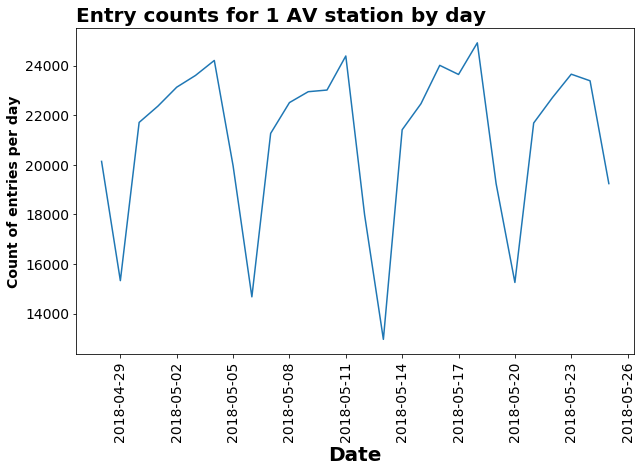

In [263]:
plt.figure(figsize=[10,6])
plt.plot(df_st[df_st['STATION']=='1 AV']['DATE'],df_st[df_st['STATION']=='1 AV']['ENTRY_DIFF'])
plt.xticks(rotation=90)
plt.title('Entry counts for 1 AV station by day',fontsize=20,weight='bold',loc='left',color='k')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.xlabel('Date',fontsize = 20, weight = 'bold',color='k')
plt.ylabel('Count of entries per day',fontsize = 14, weight = 'bold')
#(specify locs,labels,value of x axis)
plt.show()

**Challenge 8**

In [266]:
df_st['week']=df_st['DATE'].dt.weekday

In [267]:
df_st.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFFS,week
0,1 AV,2018-04-28,20139.0,23091.0,5
1,1 AV,2018-04-29,15331.0,16992.0,6
2,1 AV,2018-04-30,21710.0,24414.0,0
3,1 AV,2018-05-01,22367.0,23766.0,1
4,1 AV,2018-05-02,23130.0,24774.0,2


In [272]:
type(df_st['DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [273]:
l1=[]
for i in range(len(df_st['DATE'].values)):
     l1.append(df_st['DATE'][i].isocalendar()[1])   
#get a list of calender week no from timestamp

In [275]:
df_st.week.rename()
df_st['CAL_WEEK_NO']=l1

In [288]:
#convert calender week to string using dict comprehension for easy filtering based on week
df_st['WEEK_STR']=df_st['CAL_WEEK_NO'].map({k:('Week'+str(k)) for k in range(17,22)})

In [290]:
df_st.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFFS,week,CAL_WEEK_NO,WEEK_STR
0,1 AV,2018-04-28,20139.0,23091.0,5,17,Week17
1,1 AV,2018-04-29,15331.0,16992.0,6,17,Week17
2,1 AV,2018-04-30,21710.0,24414.0,0,18,Week18
3,1 AV,2018-05-01,22367.0,23766.0,1,18,Week18
4,1 AV,2018-05-02,23130.0,24774.0,2,18,Week18


In [294]:
one_df=df_st[df_st['STATION']=='1 AV']

In [309]:
x=one_df[one_df['WEEK_STR']=='Week18']['week']
y=one_df[one_df['WEEK_STR']=='Week18']['ENTRY_DIFF']

In [315]:
one_df.WEEK_STR.unique()

array(['Week17', 'Week18', 'Week19', 'Week20', 'Week21'], dtype=object)

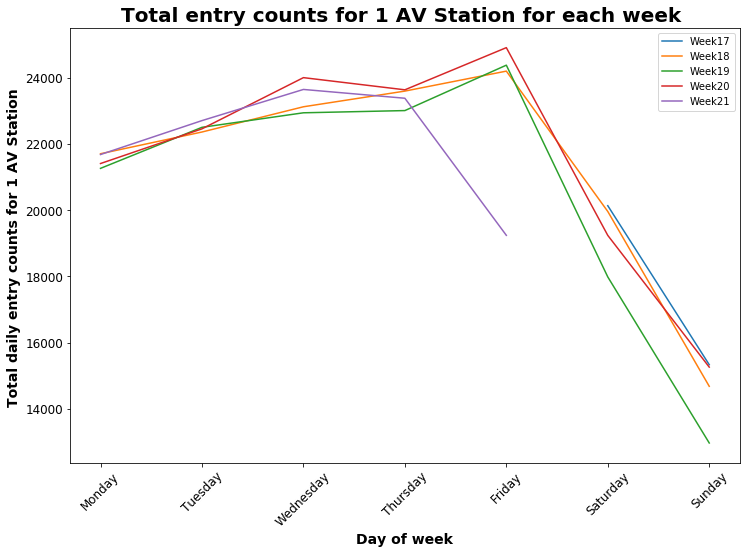

In [340]:

# ** If we want to keep this chart, change x-axis to 'Mon, Tues, Wed, etc'?

fig, ax = plt.subplots(figsize=[12,8])

for w in one_df.WEEK_STR.unique():
    
    x=one_df[one_df['WEEK_STR']==w]['week']
    y=one_df[one_df['WEEK_STR']==w]['ENTRY_DIFF']
    plt.plot(x,y)
#     xticklocs = ax.get_xticks()
#     plt.xticks(xticklocs, x_labels)
    plt.xticks(range(7),calendar.day_name[:],rotation=45)
    
    plt.ylabel('Total daily entry counts for 1 AV Station ',fontsize = 14, weight = 'bold',color='k')
    plt.xlabel('Day of week',fontsize = 14, weight = 'bold',color='k')
    plt.title('Total entry counts for 1 AV Station for each week ',fontsize = 20, weight = 'bold',color='k')
plt.legend(one_df.WEEK_STR.unique());

In [324]:
grp6=df_st.groupby(['STATION'])['ENTRY_DIFF'].sum()

In [325]:
tw=grp6.reset_index()

In [326]:
tw.sort_values(by=['ENTRY_DIFF'],inplace=True,ascending=False)

**Challenge 9**

In [327]:
tw.head(20)

,STATION,ENTRY_DIFF
59,34 ST-PENN STA,4037687.0
230,GRD CNTRL-42 ST,3483943.0
45,23 ST,2825251.0
57,34 ST-HERALD SQ,2794489.0
14,14 ST-UNION SQ,2705844.0
350,TIMES SQ-42 ST,2515356.0
223,FULTON ST,2369409.0
65,42 ST-PORT AUTH,2269785.0
107,86 ST,2122595.0
83,59 ST COLUMBUS,1913060.0


**Challenge 10**

Text(0,0.5,'Count of entries')

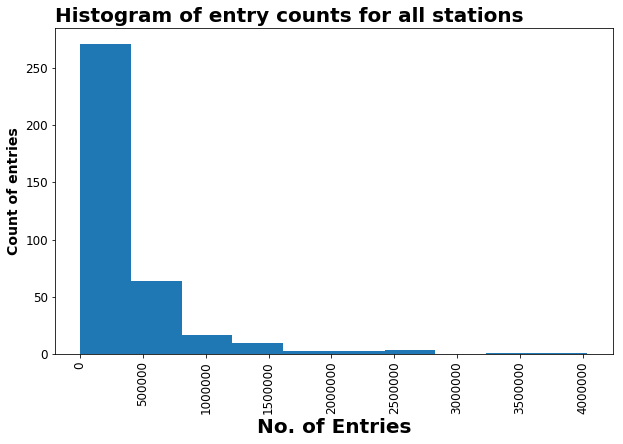

In [335]:
plt.figure(figsize=[10,6])
plt.hist(tw.ENTRY_DIFF,10)
plt.xticks(rotation=90)
plt.title('Histogram of entry counts for all stations',fontsize=20,weight='bold',loc='left',color='k')
plt.xlabel('No. of Entries',fontsize = 20, weight = 'bold',color='k')
plt.ylabel('Count of entries',fontsize = 14, weight = 'bold')